In [10]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [15]:
img3 = cv2.imread('C:\\Users\\guilh_000\\Documents\\ISIC-Archive-Downloader-master\\Data\\Images\\ISIC_0000001.jpeg',0)
img2 = img3.copy()
#template = cv2.imread('C:\\Users\\guilh_000\\Documents\\ISIC-Archive-Downloader-master\\Data\\Images\\ISIC_0000001.jpeg',0)
#w, h = template.shape[::-1]
#C:\\Users\\guilh_000\\Documents\\ISIC-Archive-Downloader-master\\Data\\Images\\ISIC_0000001.jpeg
#C:\\Users\\guilh_000\\Documents\\ISIC-Archive-Downloader-master\\Data\\Segmentation\\ISIC_0000001_expert.png

In [16]:
# global thresholding
ret1,th1 = cv.threshold(img3,127,255,cv.THRESH_BINARY_INV)
# Otsu's thresholding
ret2,th2 = cv.threshold(img3,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img3,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

In [17]:
# plot all the images and their histograms
images = [img3, 0, th1,
          img3, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

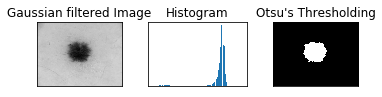

In [18]:
for i in range(2, 3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [20]:
target = cv.imread("C:\\Users\\guilh_000\\Documents\\ISIC-Archive-Downloader-master\\Data\\Segmentation\\ISIC_0000001_expert.png",0)
w, h = target.shape[::-1]

In [6]:
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

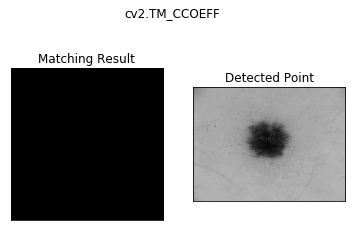

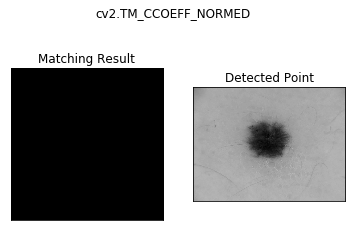

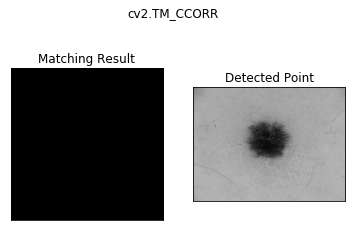

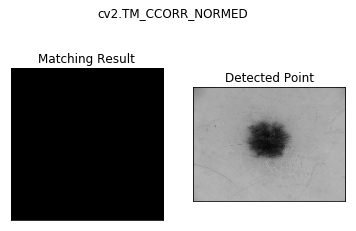

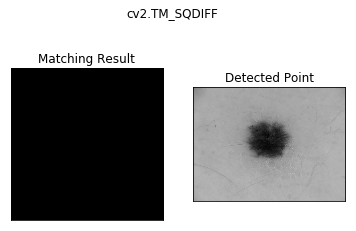

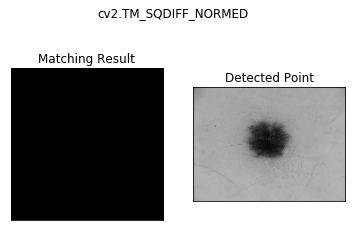

In [21]:
for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()